In [1]:
#Importing library
import pandas as pd
import warnings

from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df = pd.read_csv('Spotify_data.csv')
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [10]:
#Determining the unique values existing in the cols
cols = df.columns.tolist()

for col in cols:
    print(col ,":",df[col].unique().tolist())
    print("")

Age : ['20-35', '12-20', '35-60', '6-12', '60+']

Gender : ['Female', 'Male', 'Others']

spotify_usage_period : ['More than 2 years', '6 months to 1 year', '1 year to 2 years', 'Less than 6 months']

spotify_listening_device : ['Smart speakers or voice assistants', 'Computer or laptop', 'Smartphone, Smart speakers or voice assistants', 'Smartphone', 'Smartphone, Computer or laptop', 'Smartphone, Computer or laptop, Smart speakers or voice assistants', 'Smartphone, Wearable devices', 'Smartphone, Computer or laptop, Wearable devices', 'Computer or laptop, Wearable devices', 'Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices', 'Wearable devices', 'Smartphone, Smart speakers or voice assistants, Wearable devices', 'Computer or laptop, Smart speakers or voice assistants', 'Computer or laptop, Smart speakers or voice assistants, Wearable devices', 'Smart speakers or voice assistants, Wearable devices']

spotify_subscription_plan : ['Free (ad-supported)', '

In [11]:
#EDA
df.isna().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

In [17]:
cols_ = [
    'preffered_premium_plan',
    'fav_pod_genre',
    'fav_pod_genre',
    'pod_host_preference',
    'preffered_pod_format',
    'preffered_pod_duration'

]


for col in cols_:
    df.fillna({col:'Unknown'},inplace=True)


In [18]:
df.isna().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

In [19]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,Unknown,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,Unknown,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,Unknown,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,Unknown,Unknown,Unknown,Unknown,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,Unknown,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [20]:
df['pod_variety_satisfaction'].unique().tolist()

['Ok', 'Satisfied', 'Very Satisfied', 'Very Dissatisfied', 'Dissatisfied']

In [21]:
#Encoding target col

mapping_class = {
    'Ok':2,
    'Satisfied':3,
    'Very Satisfied':4,
    'Very Dissatisfied':0,
    'Dissatisfied':1
}

df['pod_variety_satisfaction'] = df['pod_variety_satisfaction'].map(mapping_class)

def map_to_3class(x):
    if x in range(2):
        return 0
    elif x== 2:
        return 1
    else:
        return 2

df['pod_variety_satisfaction'] = df['pod_variety_satisfaction'].apply(map_to_3class)
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,1
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,Unknown,2
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,Unknown,Both,2
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,Unknown,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,Unknown,Unknown,Unknown,Unknown,1
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,Unknown,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,1


In [22]:
#Defining feature cols
numerical_cols = ['music_recc_rating']
ordinal_cols = ['Age','spotify_usage_period','pod_lis_frequency','premium_sub_willingness','preferred_listening_content','preffered_premium_plan','preffered_pod_format','pod_host_preference','preffered_pod_duration'
]
categorical_cols = ['Gender','spotify_listening_device','spotify_subscription_plan','fav_music_genre','music_time_slot','music_Influencial_mood','music_lis_frequency','music_expl_method','fav_pod_genre'
]


In [23]:
#Preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore',sparse_output=False),categorical_cols),
        ('ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),ordinal_cols),
        ('num',StandardScaler(),numerical_cols)
    ],remainder='drop'
)

preprocessor

,transformers,"[('cat', ...), ('ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [24]:
#Splitting dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

X_train.shape , X_test.shape

((364, 19), (156, 19))

In [36]:
#Creating test set csv for streamlit

test_df = X_test.copy()
test_df['True_Label'] = y_test

test_df.to_csv("Test_With_Labels.csv",index=False)
print("Saved:Test_with_labels.csv")

Saved:Test_with_labels.csv


In [37]:
#Building Full pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
pipeline = Pipeline(steps=[
    ('prep',preprocessor),
    ('smote',SMOTE(k_neighbors=3,random_state=42)),
    ('clf',XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        n_estimators=500,
        learning_rate=0.1,
        max_depth=6,
        num_class=3,
        random_state=42
    ))
])

pipeline

,steps,"[('prep', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
#Training the model
pipeline.fit(X_train,y_train)

,steps,"[('prep', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
#Predictions
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

In [40]:
#Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(f"Accuracy:{accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"F1 Score:{f1_score(y_test,y_pred,average='macro')*100:.2f}%")
print(f"Classification Report:{classification_report(y_test,y_pred,zero_division=0)}")

Accuracy:71.79%
F1 Score:60.54%
Classification Report:              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.75      0.77      0.76        84
           2       0.67      0.71      0.69        63

    accuracy                           0.72       156
   macro avg       0.81      0.57      0.61       156
weighted avg       0.73      0.72      0.71       156



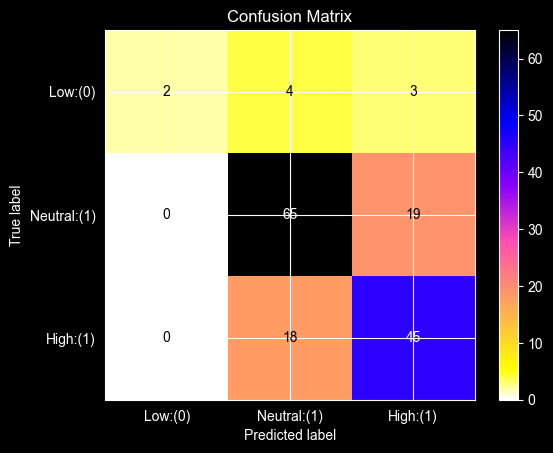

In [42]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Low:(0)','Neutral:(1)','High:(1)'])
disp.plot(cmap='gnuplot2_r',colorbar=True)
plt.style.use('dark_background')
plt.title('Confusion Matrix')
plt.show()

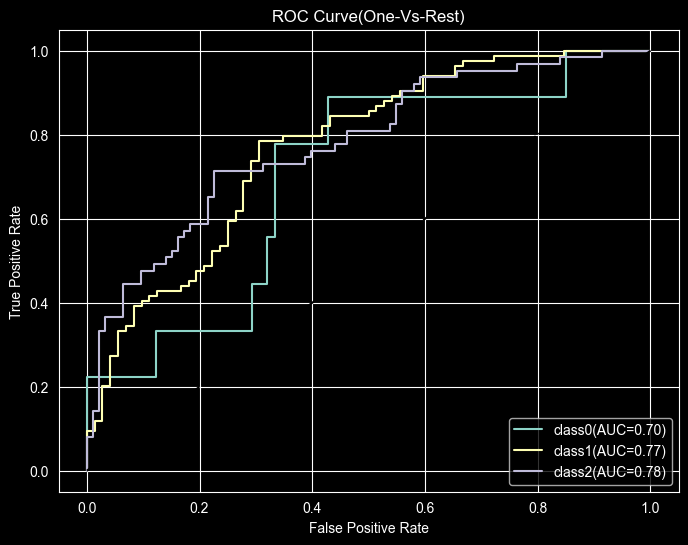

In [45]:
#ROC curve
from sklearn.metrics import roc_curve,auc

plt.figure(figsize=(8,6))
for i in range(3):
    fpr,tpr,_ = roc_curve(y_test==i,y_prob[:,i])
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'class{i}(AUC={roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve(One-Vs-Rest)')
plt.grid(True)
plt.show()


In [46]:
#Saving the pipeline for streamlit
import joblib
joblib.dump(pipeline,'Model_Pipeline.pkl')
print("Model Saved as Model_Pipeline.pkl")


Model Saved as Model_Pipeline.pkl
